# Challenge: Analyzing Text about Data Science

In this example, let's do a simple exercise that includes all the steps of a typical data science process. You don't need to write any code; you can simply click on the cells below to run them and observe the results. As a challenge, you're encouraged to test this code with different data.

## Goal

In this lesson, we've been discussing various concepts related to Data Science. Let's explore more related concepts by performing **text mining**. We'll start with a text about Data Science, extract keywords from it, and then attempt to visualize the results.

For the text, we'll use the Wikipedia page on Data Science:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Step 1: Obtaining the Data

The first step in any data science process is obtaining the data. We'll use the `requests` library for this:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Step 2: Transforming the Data

The next step is to convert the data into a format suitable for processing. In our case, we have downloaded the HTML source code from the page, and now we need to transform it into plain text.

There are several ways to achieve this. We will use the simplest method: the built-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. To do this, we need to create a subclass of the `HTMLParser` class and write code that extracts all text contained within HTML tags, excluding `<script>` and `<style>` tags.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Step 3: Getting Insights

The most important step is to transform our data into a format that allows us to derive insights. In this case, we aim to extract keywords from the text and identify which keywords carry the most significance.

We will use a Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library if it is not already installed:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

We obtained a list of terms along with their associated level of importance. As you can see, the most relevant fields, such as machine learning and big data, appear at the top of the list.

## Step 4: Visualizing the Result

People understand data best when it's presented visually. Therefore, it often makes sense to visualize the data to extract insights. We can use the `matplotlib` library in Python to plot a simple distribution of the keywords based on their relevance:


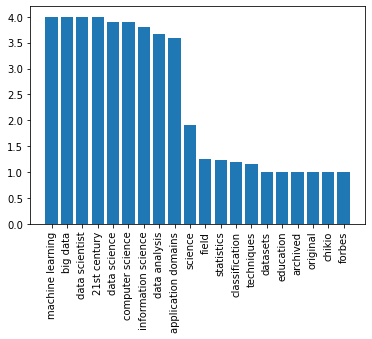

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.


In [71]:
!{sys.executable} -m pip install wordcloud

WordCloud object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns an image, which can then be displayed using matplotlib:


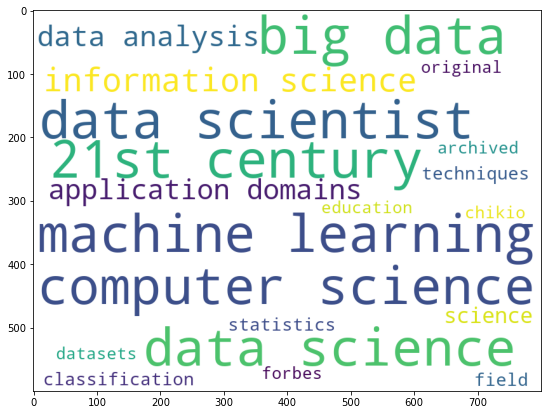

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:


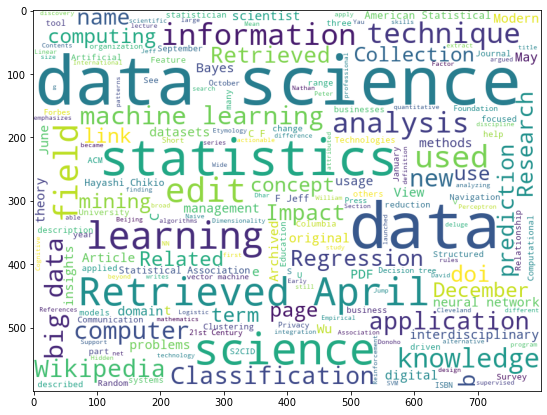

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

You can see that the word cloud now looks more impressive, but it also contains a lot of noise (e.g., unrelated words such as `Retrieved on`). Additionally, we get fewer keywords that consist of two words, like *data scientist* or *computer science*. This happens because the RAKE algorithm does a much better job of selecting meaningful keywords from the text. This example highlights the importance of data pre-processing and cleaning, as having a clear picture in the end will help us make better decisions.

In this exercise, we went through a simple process of extracting some meaning from Wikipedia text in the form of keywords and a word cloud. While this example is quite basic, it effectively demonstrates the typical steps a data scientist takes when working with data, starting from data acquisition all the way to visualization.

In our course, we will discuss all of these steps in detail.



---

**Disclaimer**:  
This document has been translated using the AI translation service [Co-op Translator](https://github.com/Azure/co-op-translator). While we aim for accuracy, please note that automated translations may include errors or inaccuracies. The original document in its native language should be regarded as the authoritative source. For critical information, professional human translation is advised. We are not responsible for any misunderstandings or misinterpretations resulting from the use of this translation.
